In [1]:
import numpy as np
from scipy.io import loadmat,savemat
import matplotlib.pyplot as plt
import matplotlib as mpl
from einops import rearrange
import matplotlib
matplotlib.__version__

'3.5.3'

In [2]:
B0 = 3
data_coil_trace = loadmat('data_coil_trace.mat')
B0_map = loadmat('B0_map.mat')
coil_trace = [np.asarray(data_coil_trace['data_coil_trace'][i][0]) for i in range(29)]
B0_no_shim = np.flip(rearrange(np.asarray(B0_map['B0_no_shim']), "z x y -> x y z"),axis=0)
B0_shim = np.flip(rearrange(np.asarray(B0_map['B0_shim']), "z x y -> x y z"),axis=0)
vox_pos = np.asarray([B0_map['X'],B0_map['Y'],B0_map['Z']/10])
print(B0_no_shim.shape, B0_shim.shape, vox_pos.shape)

valid_idx = np.argwhere(~np.isnan(B0_no_shim))
B0_no_shim_ = B0_no_shim[valid_idx[:,0],valid_idx[:,1],valid_idx[:,2]]
B0_shim_ = B0_shim[valid_idx[:,0],valid_idx[:,1],valid_idx[:,2]]
alpha = B0_shim_*32+256
valid_pos = vox_pos[:,valid_idx[:,0],valid_idx[:,1],valid_idx[:,2]]

savemat('B0_map_valid.mat', {'B0_no_shim': B0_no_shim_*B0, 'B0_shim': B0_shim_*B0, 'X': valid_pos[0], 'Y': valid_pos[1], 'Z': valid_pos[2]})

(200, 200, 40) (200, 200, 40) (3, 200, 200, 40)


dict_keys(['__header__', '__version__', '__globals__', 'B0_active_shim', 'B0_no_shim', 'B0_shim', 'c', 'fval', 'output', 'points'])
(620785,) (620785,) (620785,)


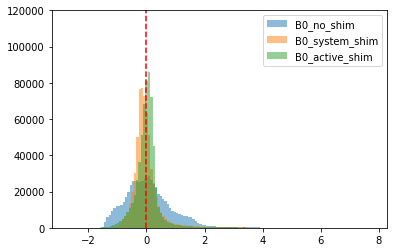

In [3]:
# active_shim_result = loadmat('std_particleswarm_results.mat')
L2_active_shim_result = loadmat('norm_particleswarm_results.mat')
print(L2_active_shim_result.keys())
B0_no_shim = L2_active_shim_result['B0_no_shim'].squeeze()
B0_active_shim = L2_active_shim_result['B0_active_shim'].squeeze()
B0_system_shim = L2_active_shim_result['B0_shim'].squeeze()
print(B0_no_shim.shape, B0_active_shim.shape, B0_system_shim.shape)
alpha_no_shim = (B0_no_shim-np.min(B0_no_shim))/(np.max(B0_no_shim)-np.min(B0_no_shim))
alpha_active_shim = (B0_active_shim-np.min(B0_no_shim))/(np.max(B0_no_shim)-np.min(B0_no_shim))
alpha_system_shim = (B0_system_shim-np.min(B0_no_shim))/(np.max(B0_no_shim)-np.min(B0_no_shim))

plt.hist(B0_no_shim, bins=120, alpha=0.5, label='B0_no_shim')
plt.hist(B0_system_shim, bins=120, alpha=0.5, label='B0_system_shim')
plt.hist(B0_active_shim, bins=120, alpha=0.5, label='B0_active_shim')
plt.legend()
plt.plot([0,0],[0,1.2e5],'r--')
plt.ylim(0,1.2e5)
plt.show()

(3, 620785) (620785,)
(3, 620787) (620787,)


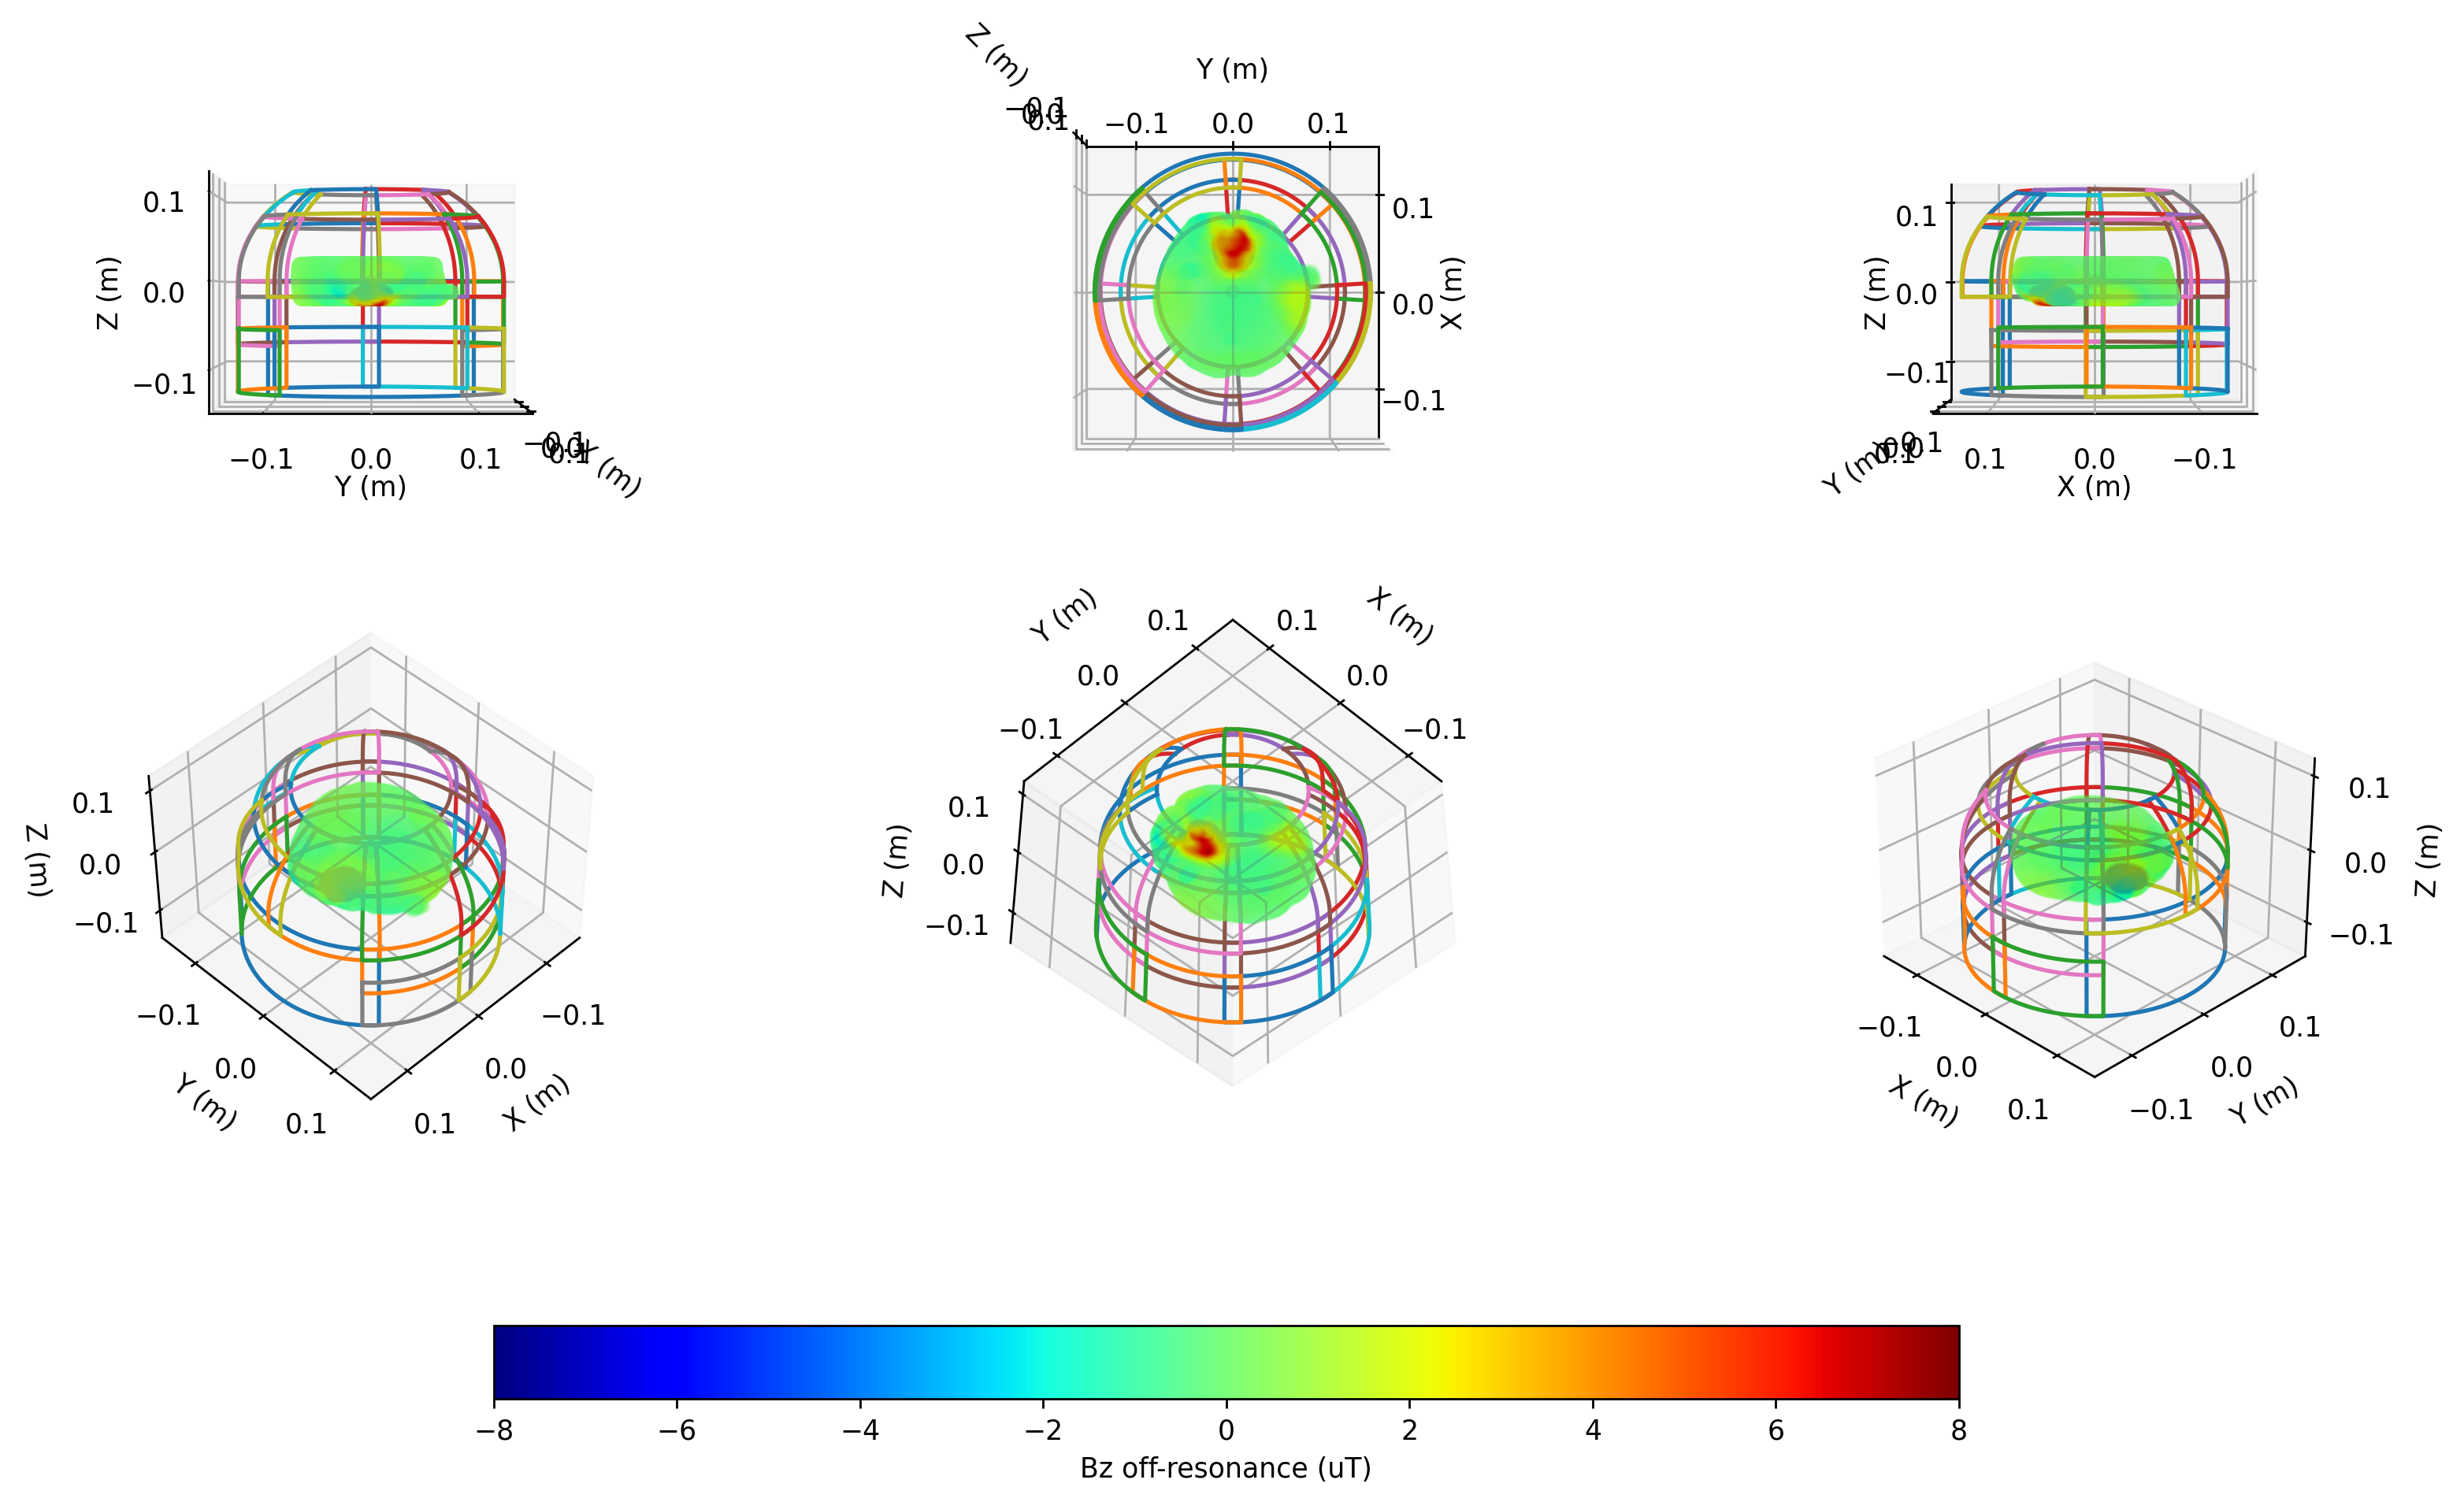

In [4]:
print(valid_pos.shape, B0_shim_.shape)
valid_pos = np.hstack([valid_pos,np.zeros((3,2))])
B0_shim_ = np.append(B0_shim_*3,[-8,8])
print(valid_pos.shape, B0_shim_.shape)
fig = plt.figure(dpi=250,figsize=(16,10))
ax1 = fig.add_subplot(2,3,1,projection='3d')
for tr in coil_trace:
    ax1.plot3D(tr[0], tr[1], tr[2])
ax1.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_shim_, cmap='jet')
ax1.view_init(elev=0, azim=0)
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')

ax2=fig.add_subplot(2,3,2,projection='3d')
for tr in coil_trace:
    ax2.plot3D(tr[0], tr[1], tr[2])
ax2.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_shim_, cmap='jet')
ax2.view_init(elev=-90, azim=0)
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Z (m)')

ax3=fig.add_subplot(2,3,3,projection='3d')
for tr in coil_trace:
    ax3.plot3D(tr[0], tr[1], tr[2])
ax3.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_shim_, cmap='jet')
ax3.view_init(elev=0, azim=90)
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
ax3.set_zlabel('Z (m)')

ax4=fig.add_subplot(2,3,4,projection='3d')
for tr in coil_trace:
    ax4.plot3D(tr[0], tr[1], tr[2])
ax4.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_shim_, cmap='jet')
ax4.view_init(elev=45, azim=45)
ax4.set_xlabel('X (m)')
ax4.set_ylabel('Y (m)')
ax4.set_zlabel('Z (m)')

ax5=fig.add_subplot(2,3,5,projection='3d')
for tr in coil_trace:
    ax5.plot3D(tr[0], tr[1], tr[2])
ax5.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_shim_, cmap='jet')
ax5.view_init(elev=-45, azim=45)
ax5.set_xlabel('X (m)')
ax5.set_ylabel('Y (m)')
ax5.set_zlabel('Z (m)')

ax6=fig.add_subplot(2,3,6,projection='3d')
for tr in coil_trace:
    ax6.plot3D(tr[0], tr[1], tr[2])
ax6.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.01, c=B0_shim_, cmap='jet')
ax6.view_init(elev=30, azim=-45)
ax6.set_xlabel('X (m)')
ax6.set_ylabel('Y (m)')
ax6.set_zlabel('Z (m)')

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-8, vmax=8), cmap='jet'), ax=[ax1,ax2,ax3,ax4,ax5,ax6], orientation='horizontal', label='Bz off-resonance (uT)', shrink=0.6)

plt.show()

(3, 620785)


Text(0.5, 1.0, 'Optimized Currents')

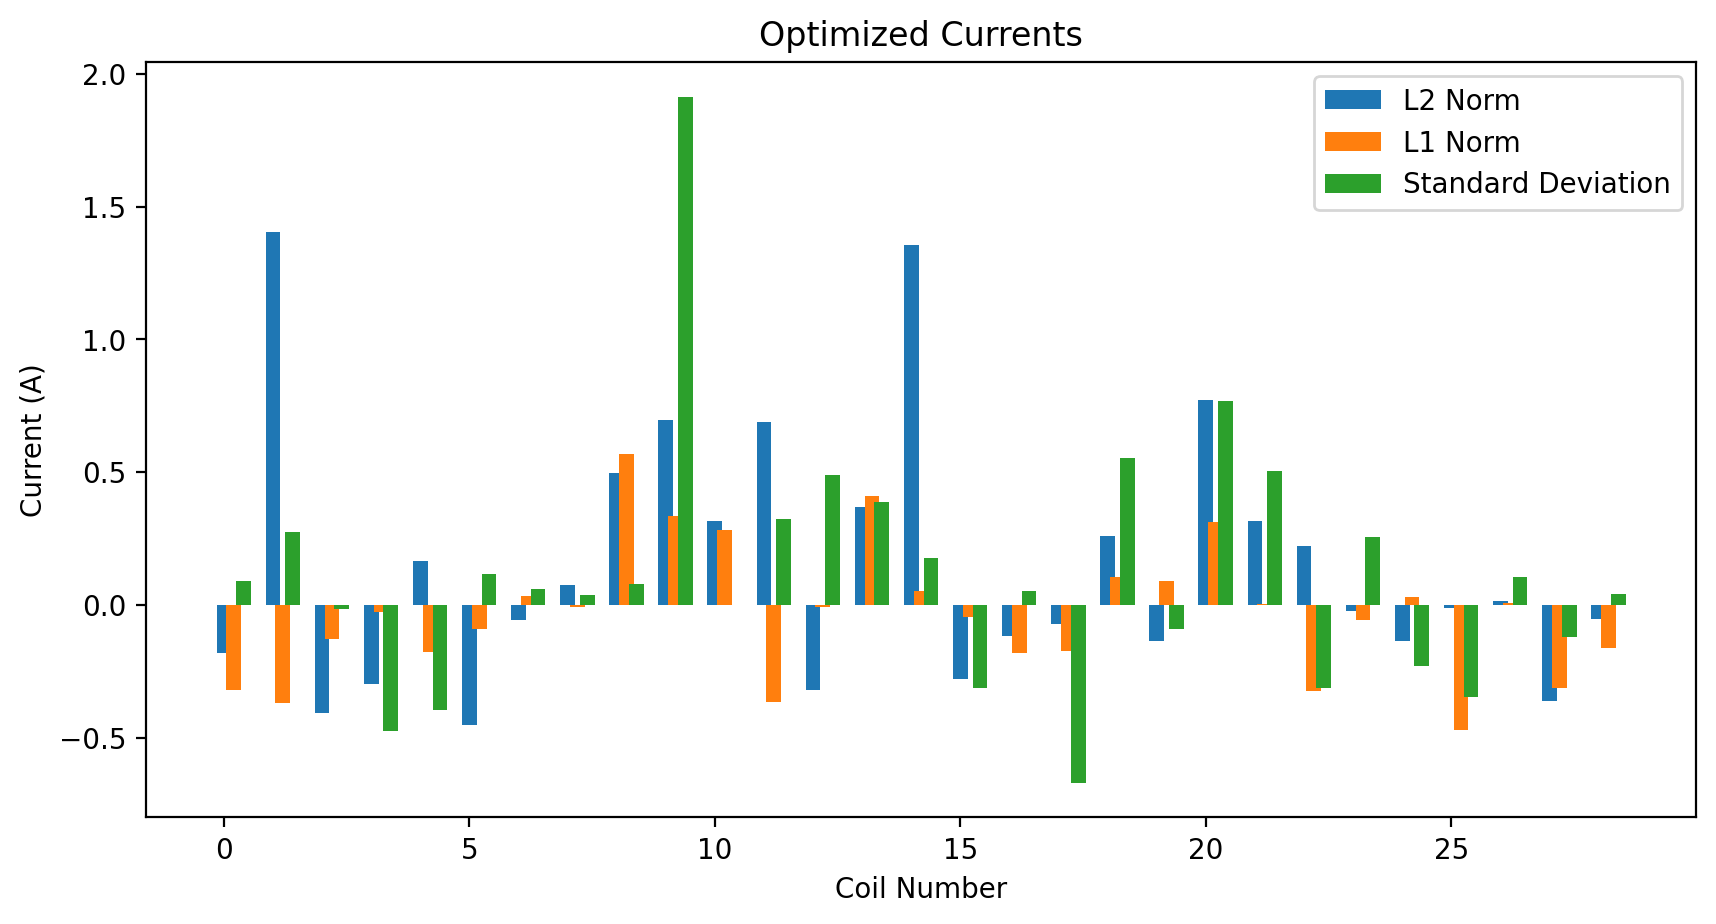

In [106]:
L2_active_shim_result = loadmat('norm_particleswarm_results.mat')
L1_active_shim_result = loadmat('L1_particleswarm_results.mat')
std_active_shim_result = loadmat('std_particleswarm_results.mat')
X,Y,Z = loadmat("B0_map_valid.mat")['X'], loadmat("B0_map_valid.mat")['Y'], loadmat("B0_map_valid.mat")['Z']
pos = np.vstack([X,Y,Z])
print(pos.shape)

B0_no_shim = L2_active_shim_result['B0_no_shim']
B0_system_shim = std_active_shim_result['B0_shim']
B0_active_shim_L2 = L2_active_shim_result['B0_active_shim']
B0_active_shim_std = std_active_shim_result['B0_active_shim']
B0_active_shim_L1 = L1_active_shim_result['B0_active_shim']

plt.figure(figsize=(10,5),dpi=200)
plt.bar(np.arange(29), L2_active_shim_result['c'].flatten(),alpha=1,width=0.3, label = "L2 Norm")
plt.bar(np.arange(29)+0.2, L1_active_shim_result['c'].flatten(),alpha=1,width=0.3, label = "L1 Norm")
plt.bar(np.arange(29)+0.4, std_active_shim_result['c'].flatten(),alpha=1,width=0.3, label = "Standard Deviation")
plt.legend()
plt.ylabel("Current (A)")
plt.xlabel("Coil Number")
plt.title("Optimized Currents")

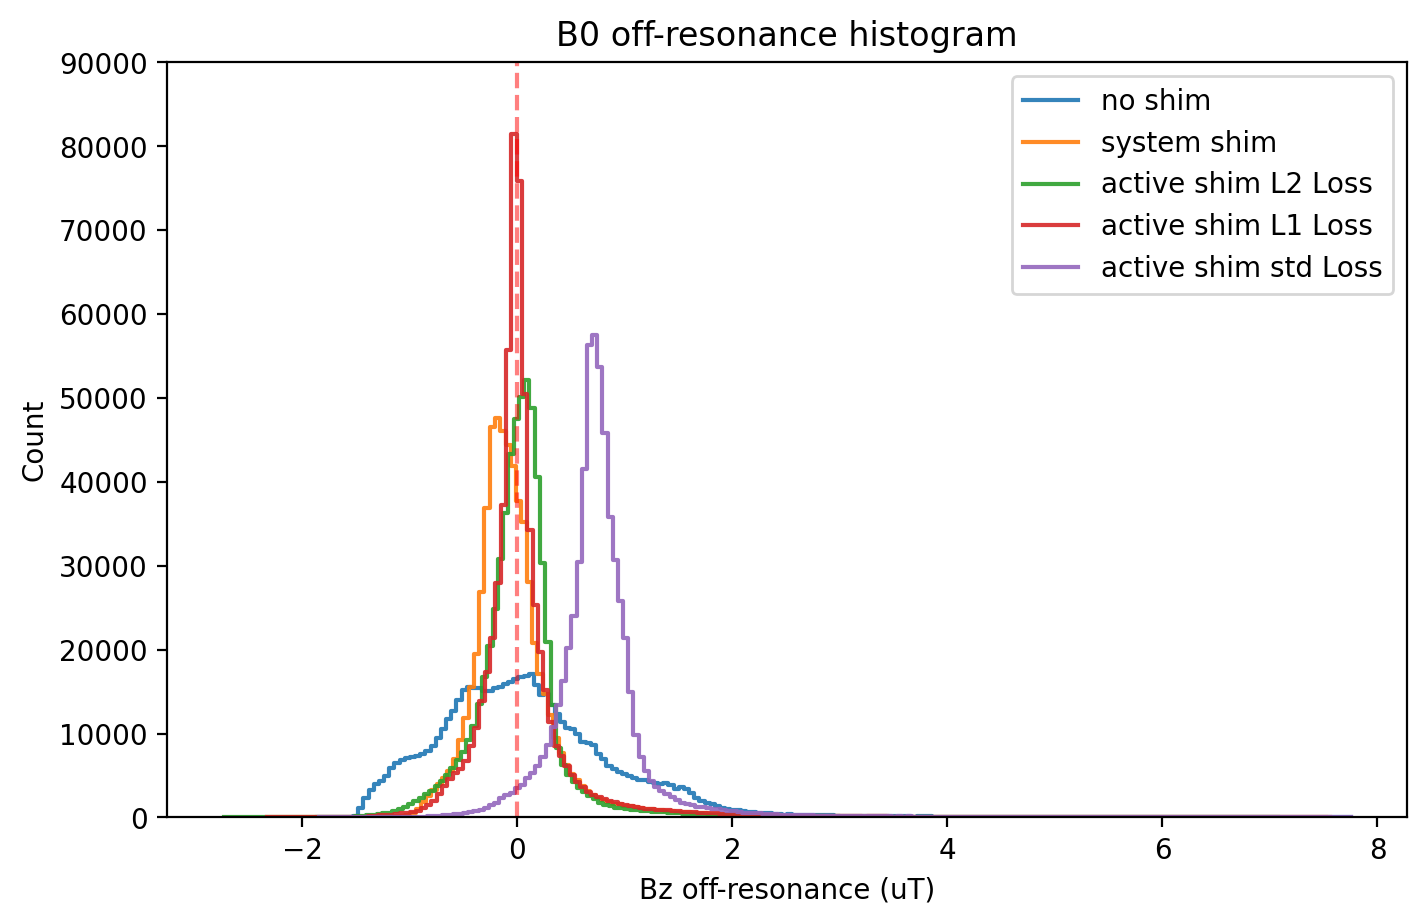

In [108]:
import seaborn as sns
plt.figure(figsize=(8,5),dpi=200)
sns.histplot(B0_no_shim.flatten(), bins=200, alpha=0.9, label='no shim',element="step",fill=False)
sns.histplot(B0_system_shim.flatten(), bins=200, alpha=0.9, label='system shim',element="step",fill=False)
sns.histplot(B0_active_shim_L2.flatten(), bins=200, alpha=0.9, label='active shim L2 Loss',element="step",fill=False)
sns.histplot(B0_active_shim_L1.flatten(), bins=200, alpha=0.9, label='active shim L1 Loss',element="step",fill=False)
sns.histplot(B0_active_shim_std.flatten(), bins=200, alpha=0.9, label='active shim std Loss',element="step",fill=False)
plt.plot([0,0],[0,90000],linestyle="--",c='r',alpha=0.5)
plt.ylim(0,90000)
plt.legend()
plt.xlabel("Bz off-resonance (uT)")
plt.title("B0 off-resonance histogram")
plt.show()

In [113]:
ppm_no_shim = B0_no_shim.flatten()/3
ppm_system_shim = B0_system_shim.flatten()/3
ppm_active_shim_L2 = B0_active_shim_L2.flatten()/3
ppm_active_shim_L1 = B0_active_shim_L1.flatten()/3
ppm_active_shim_std = B0_active_shim_std.flatten()/3



print("|No Shim|",ppm_no_shim.max()-ppm_no_shim.min(), "|", np.linalg.norm(ppm_no_shim),"|",np.std(ppm_no_shim), "| |")
print("|System Shim|",ppm_system_shim.max()-ppm_system_shim.min(), "|", np.linalg.norm(ppm_system_shim),"|",np.std(ppm_system_shim), "|", (np.linalg.norm(ppm_no_shim)-np.linalg.norm(ppm_system_shim))/np.linalg.norm(ppm_no_shim)*100,"%|")
print("|Active Shim L2 norm|",ppm_active_shim_L2.max()-ppm_active_shim_L2.min(), "|", np.linalg.norm(ppm_active_shim_L2),"|",np.std(ppm_active_shim_L2), "|", (np.linalg.norm(ppm_no_shim)-np.linalg.norm(ppm_active_shim_L2))/np.linalg.norm(ppm_no_shim)*100,"%|")
print("|Active Shim L1 norm|",ppm_active_shim_L1.max()-ppm_active_shim_L1.min(), "|", np.linalg.norm(ppm_active_shim_L1),"|",np.std(ppm_active_shim_L1), "|", (np.linalg.norm(ppm_no_shim)-np.linalg.norm(ppm_active_shim_L1))/np.linalg.norm(ppm_no_shim)*100,"%|")
print("|Active Shim Std norm|",ppm_active_shim_std.max()-ppm_active_shim_std.min(), "|", np.linalg.norm(ppm_active_shim_std),"|",np.std(ppm_active_shim_std), "|", (np.linalg.norm(ppm_no_shim)-np.linalg.norm(ppm_active_shim_std))/np.linalg.norm(ppm_no_shim)*100,"%|")

|No Shim| 3.2061537476947892 | 229.59558193744226 | 0.2896884704533632 | |
|System Shim| 3.2839351317270338 | 148.54703427693633 | 0.1885316695711095 | 35.30056936487095 %|
|Active Shim L2 norm| 3.2693473809440103 | 133.12265136607897 | 0.1686652658312444 | 42.01863544467036 %|
|Active Shim L1 norm| 3.2974506754726853 | 144.78054561801 | 0.18248164442468554 | 36.94105766483858 %|
|Active Shim Std norm| 3.201204131851448 | 239.135470295876 | 0.1664213702474948 | -4.1550835943494135 %|


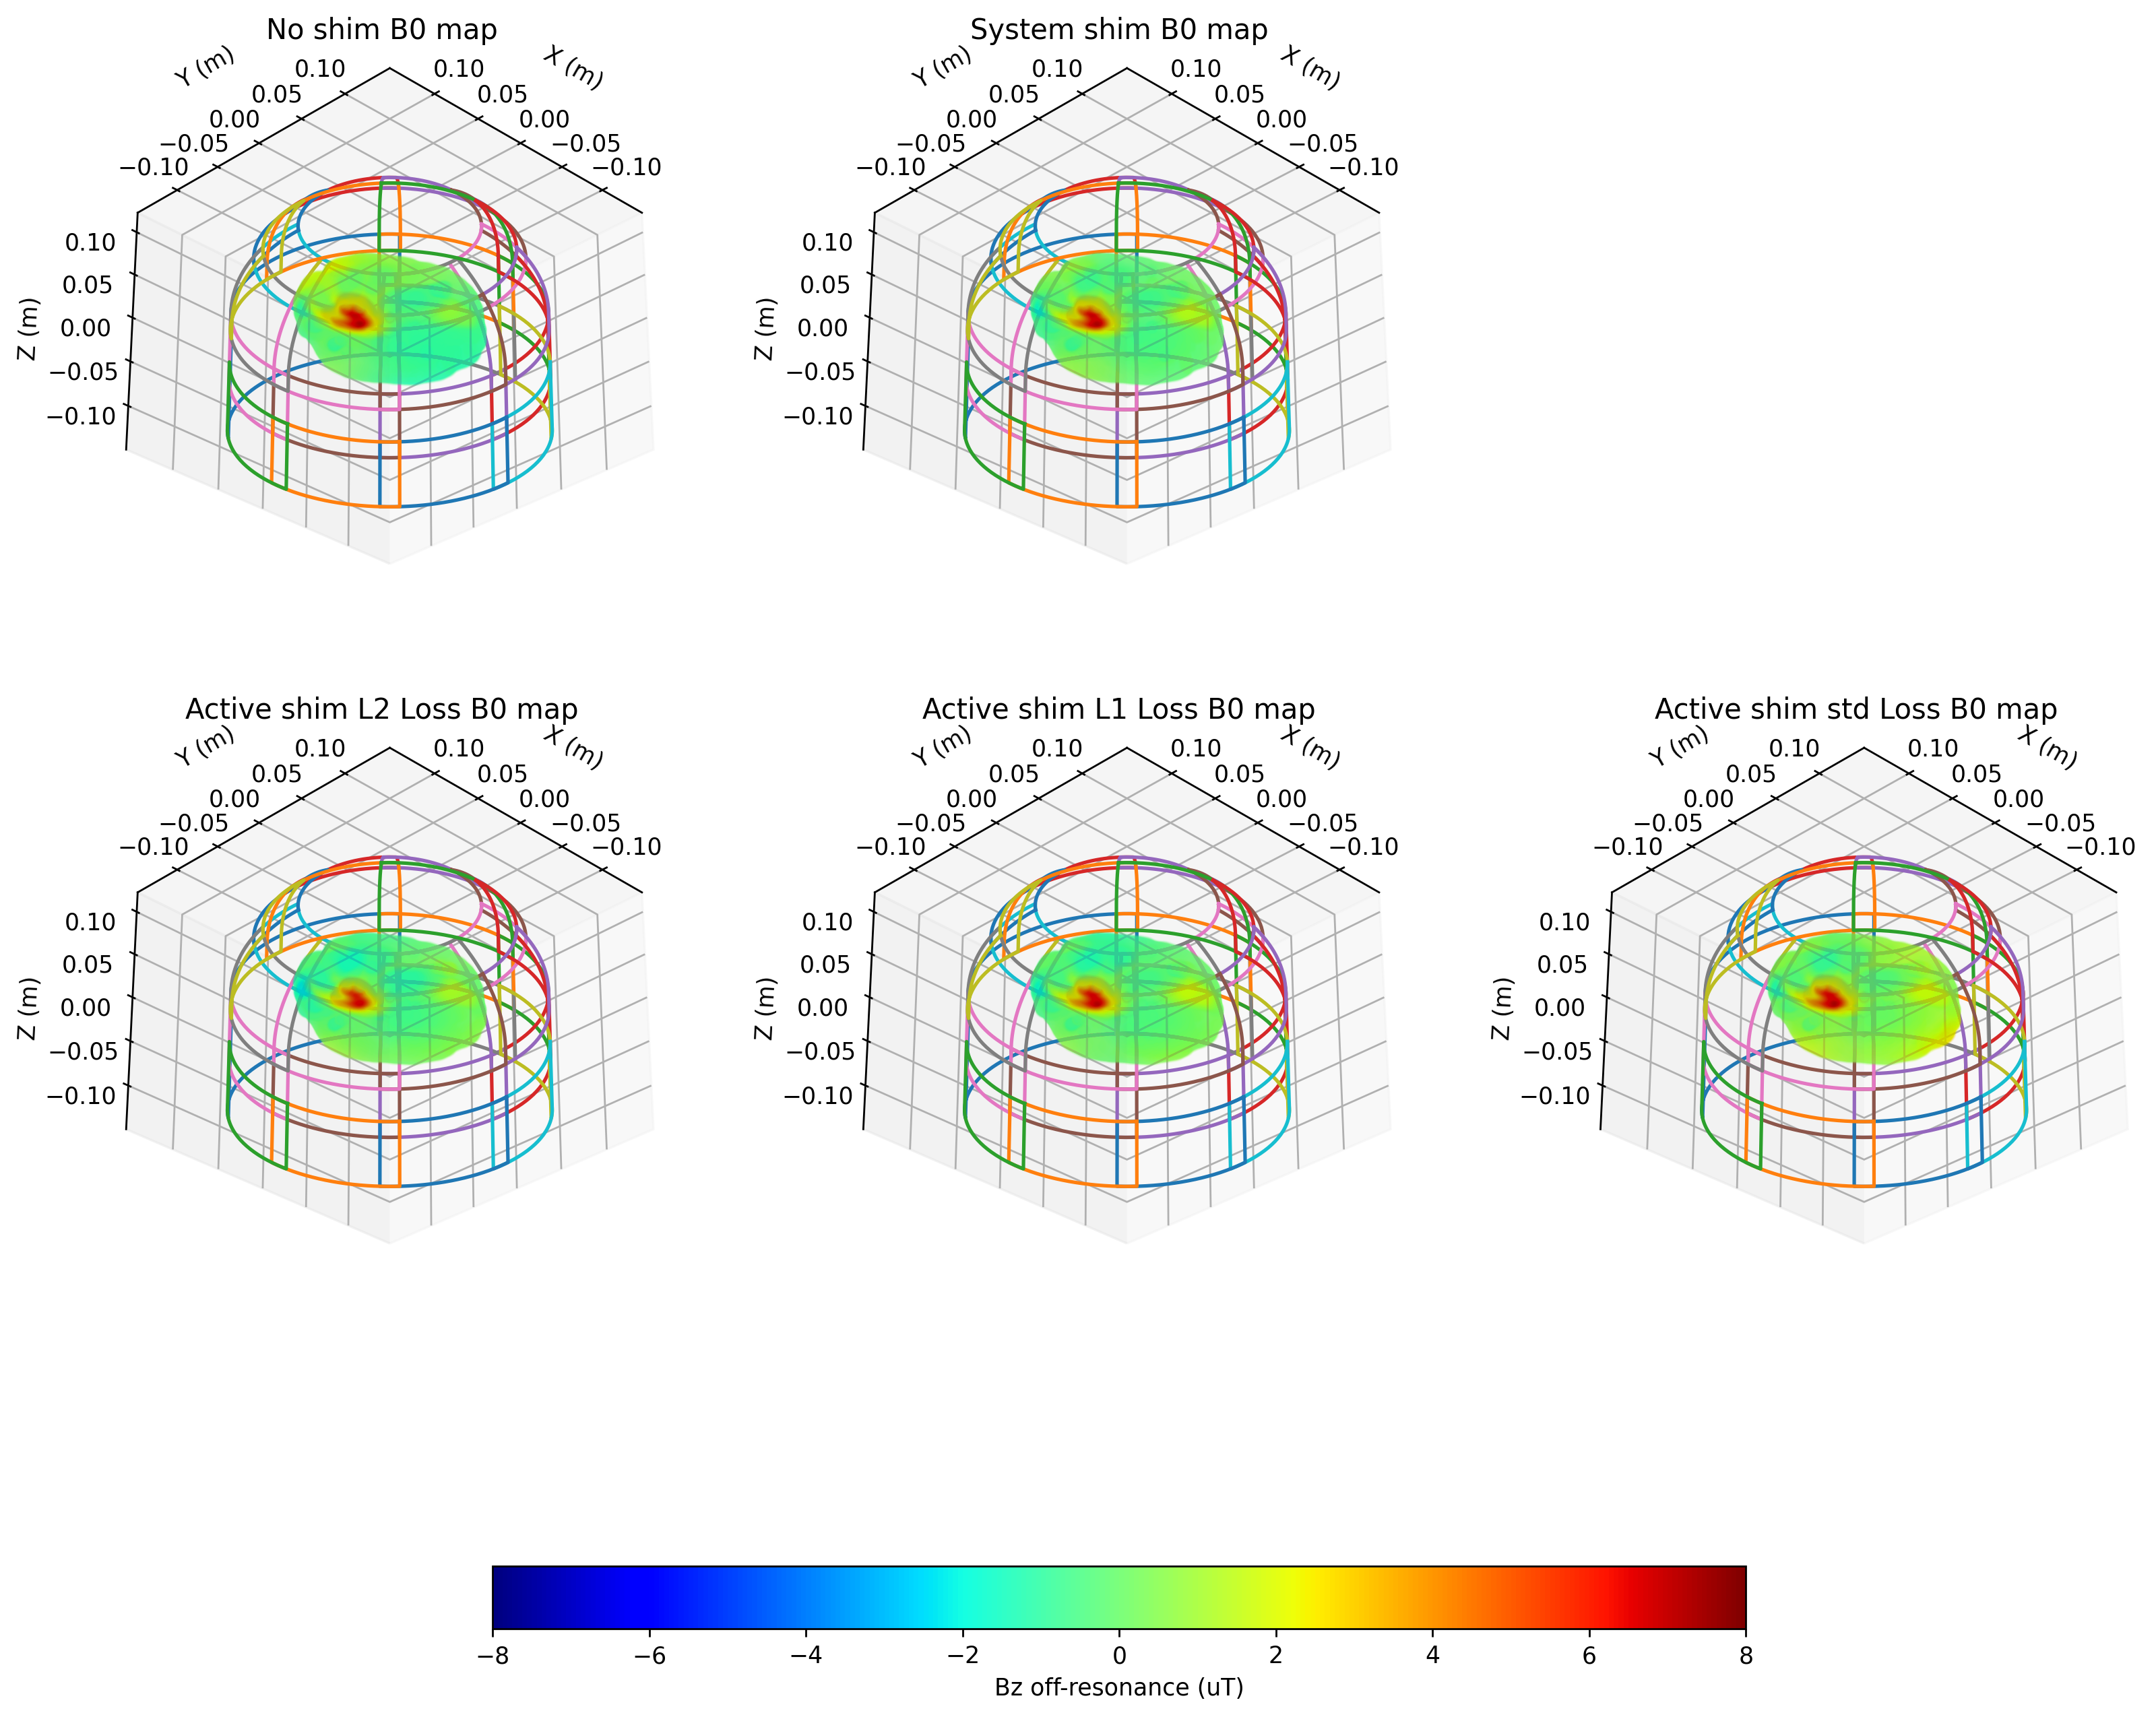

In [103]:
pos = np.hstack([pos,np.zeros((3,2))])
B0_no_shim = np.append(B0_no_shim,[-8,8])
B0_system_shim = np.append(B0_system_shim,[-8,8])
B0_active_shim_L1 = np.append(B0_active_shim_L1,[-8,8])
B0_active_shim_L2 = np.append(B0_active_shim_L2,[-8,8])
B0_active_shim_std = np.append(B0_active_shim_std,[-8,8])
fig = plt.figure(dpi=250,figsize=(16,14))
ax0 = fig.add_subplot(2,3,1,projection='3d')
for tr in coil_trace:
    ax0.plot3D(tr[0], tr[1], tr[2])
ax0.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_no_shim, cmap='jet')
ax0.view_init(elev=-30, azim=45)
ax0.set_xlabel('X (m)')
ax0.set_ylabel('Y (m)')
ax0.set_zlabel('Z (m)')
ax0.set_title('No shim B0 map')

ax1 = fig.add_subplot(2,3,2,projection='3d')
for tr in coil_trace:
    ax1.plot3D(tr[0], tr[1], tr[2])
ax1.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_system_shim, cmap='jet')
ax1.view_init(elev=-30, azim=45)
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('System shim B0 map')

ax3 = fig.add_subplot(2,3,4,projection='3d')
for tr in coil_trace:
    ax3.plot3D(tr[0], tr[1], tr[2])
ax3.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_active_shim_L2, cmap='jet')
ax3.view_init(elev=-30, azim=45)
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
ax3.set_zlabel('Z (m)')
ax3.set_title('Active shim L2 Loss B0 map')

ax4 = fig.add_subplot(2,3,5,projection='3d')
for tr in coil_trace:
    ax4.plot3D(tr[0], tr[1], tr[2])
ax4.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_active_shim_L1, cmap='jet')
ax4.view_init(elev=-30, azim=45)
ax4.set_xlabel('X (m)')
ax4.set_ylabel('Y (m)')
ax4.set_zlabel('Z (m)')
ax4.set_title('Active shim L1 Loss B0 map')

ax5 = fig.add_subplot(2,3,6,projection='3d')
for tr in coil_trace:
    ax5.plot3D(tr[0], tr[1], tr[2])
ax5.scatter(valid_pos[0], valid_pos[1], valid_pos[2], alpha=0.02, c=B0_active_shim_std, cmap='jet')
ax5.view_init(elev=-30, azim=45)
ax5.set_xlabel('X (m)')
ax5.set_ylabel('Y (m)')
ax5.set_zlabel('Z (m)')
ax5.set_title('Active shim std Loss B0 map')

# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-8, vmax=8), cmap='jet'), ax=[ax0,ax1,ax3,ax4,ax5], orientation='horizontal', label='Bz off-resonance (uT)', shrink=0.6)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-8, vmax=8), cmap='jet'), ax=[ax0,ax1,ax3,ax4,ax5], orientation='horizontal', label='Bz off-resonance (uT)', shrink=0.6)

plt.show()